In [28]:
!python ../src/utils.py
%reload_ext autoreload

In [29]:
import os
import math
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt
import copy
import utils 
from ROOT import VecOps
from analysis import (df, df_filtered, tree, HMNCSBR, TRUNCSBR, COLOR_MAP)

name_tag = str(utils.TAG)
print("cwd:", os.getcwd())

cwd: /home/bothsides/Desktop/optimizing_DEDx_estimator/notebooks


In [16]:
cluster = df.AsNumpy(["cluster_DeDxStrip"])["cluster_DeDxStrip"]
drawer = utils.HistogramDrawer()

**Input parameters I am working with now**
+ threshold
- seeds
* range fit
+ freedman_diaconis bins
- cluster
* track level h2 dedx calculator


__I should be able to return all the parameters I need to see the distribution (mpv, stddev, h2 mean) with a single parent loop__

__filter out the fits that did not converge or have pathalogical mpvs__

__check how strongly the fits tighten the mpv distributions__

In [17]:

results = utils.fit_mpv(cluster, 5, 10000)

Error in <Minuit2>: VariableMetricBuilder Initial matrix not pos.def.
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Error in <Minuit2>: VariableMetricBuilder Initial matrix not pos.def.
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Error in <Minuit2>: VariableMetricBuilder Initial matrix not pos.def.
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Error in <Minuit2>: VariableMetricBuilder Initial matrix not pos.def.
Error in <Minuit2>: VariableMetricBuilder Initial matrix not pos.def.


In [18]:
neg_tracks = results["neg_tracks"]
neg_track_labels = results["neg_mpvs"]


print(len(neg_tracks))

for label, track in zip(neg_track_labels, neg_tracks):
  print(f"{label} : {track}")

18
Event 36888 Trk 2 : { 2.87084f, 7.24237f, 6.13317f, 10.3733f, 18.6288f, 136.122f }
Event 37009 Trk 1 : { 3.93640f, 6.40171f, 3.93247f, 3.06810f, 3.73513f, 2.05625f, 2.60408f, 59.3439f }
Event 37077 Trk 1 : { 7.23092f, 3.21012f, 3.43804f, 99.2167f, 7.71873f, 0.972959f }
Event 37658 Trk 5 : { 3.92032f, 9.37611f, 70.5981f, 4.60633f, 2.58087f, 2.54820f, 3.98561f, 2.05819f }
Event 42271 Trk 0 : { 7.37285f, 3.14832f, 3.37351f, 82.5019f, 2.60977f, 2.95203f }
Event 42577 Trk 0 : { 7.71427f, 7.27343f, 168.580f, 12.7205f, 8.81630f, 6.51776f, 5.73063f, 7.74582f, 6.12025f, 8.00448f, 6.17840f, 6.74174f, 6.46979f, 4.83757f, 4.48795f, 6.70362f }
Event 43057 Trk 4 : { 3.15743f, 3.43331f, 4.28202f, 9.58706f, 2.82304f, 3.58343f, 2.14246f, 3.52100f, 76.7960f }
Event 43106 Trk 0 : { 2.55813f, 2.74532f, 3.77468f, 2.71405f, 4.86658f, 3.15082f, 2.68290f, 3.83715f, 3.05725f, 3.02199f, 4.60036f, 3.08001f, 63.1572f, 6.19792f, 5.65915f, 3.15677f, 2.88726f }
Event 43249 Trk 2 : { 19.8500f, 16.0639f, 7.21180f, 

In [19]:
labels = neg_track_labels

desired_branches = [
    "DeDx_IhStrip",
    "IsoTrack_pt",
    "IsoTrack_eta",
    "IsoTrack_isHighPurityTrack"
]

# first call builds the cache
vals, evt_cache = utils.get_attrs_for_labels(tree, labels, desired_branches)

# # later calls reuse the same cache (fast!)
# more_vals, _ = get_attrs_for_labels(tree, other_labels, desired_branches, evt_cache)

# precalc_vals = vals 
temp = vals
loop_vals = copy.deepcopy(vals)
# precalc_vals = temp
# inspect:
for lbl, d in vals.items():
    print(lbl)
    for k, v in d.items():
        print(f"  {k:20} = {v}")


Event 36888 Trk 2
  DeDx_IhStrip         = 5.786173343658447
  IsoTrack_pt          = 78.0517056452733
  IsoTrack_eta         = -2.381635640287952
  IsoTrack_isHighPurityTrack = False
Event 37009 Trk 1
  DeDx_IhStrip         = 3.3431618213653564
  IsoTrack_pt          = 64.96723705191845
  IsoTrack_eta         = -0.40910814377098254
  IsoTrack_isHighPurityTrack = True
Event 37077 Trk 1
  DeDx_IhStrip         = 2.170145034790039
  IsoTrack_pt          = 46.331066734509655
  IsoTrack_eta         = 2.228930827939327
  IsoTrack_isHighPurityTrack = False
Event 37658 Trk 5
  DeDx_IhStrip         = 3.3174257278442383
  IsoTrack_pt          = 227.7040542874987
  IsoTrack_eta         = -2.4237440713764067
  IsoTrack_isHighPurityTrack = False
Event 42271 Trk 0
  DeDx_IhStrip         = 3.5772249698638916
  IsoTrack_pt          = 286.1144550523513
  IsoTrack_eta         = -0.9950261646287566
  IsoTrack_isHighPurityTrack = False
Event 42577 Trk 0
  DeDx_IhStrip         = 6.718465328216553
  IsoTrac

In [20]:
assert loop_vals is not precalc_vals

In [22]:
labels = loop_vals.keys() & precalc_vals.keys()  # intersection

same = all(
    utils.records_equal(loop_vals[lbl], precalc_vals[lbl])
    for lbl in labels
)

print("All identical:", same)


All identical: True


In [ ]:
def plot_track_distributions(tracks, labels=None):
    """
    tracks : list of sequences of hit-values
    labels : optional list of titles for each track
    bins   : histogram bin count
    """
    for i, track in enumerate(tracks):
        # Freedman–Diaconis binning
        nbins, lo, hi = utils.freedman_diaconis_bins(track)
        plt.figure()
        plt.hist(track, bins=nbins, range=(lo, hi))
        bw = (hi - lo)/nbins
        title = labels[i] if labels is not None else f"Track #{i}"
        plt.title(title)
        plt.xlabel("dE/dx")
        plt.ylabel(f"hits / {bw:.2f}")
        plt.tight_layout()
        plt.show()


In [ ]:


def plot_track_distributions_pyroot(tracks, labels=None, cols=2, canvas_name="c_tracks"):
    """
    tracks      : list of sequences of hit-values
    labels      : optional list of strings, one per track
    cols        : number of columns in the canvas grid
    canvas_name : name/title for the TCanvas
    
    Returns (canvas, histo_list) where histo_list is a list of (TH1F, TF1) tuples.
    """
    N    = len(tracks)
    rows = math.ceil(N / cols)
    c    = rt.TCanvas(canvas_name, canvas_name, cols*800, rows*800)
    c.Divide(cols, rows)
    
    results = []
    for i, track in enumerate(tracks):
        pad = c.cd(i+1)
        
        # Freedman–Diaconis binning
        nbins, lo, hi = utils.freedman_diaconis_bins(track)
        title         = labels[i] if labels else f"Track {i}"
        
        # make & fill histogram
        h = rt.TH1F(f"h_{i}", title, nbins, lo, hi)
        for x in track:
            h.Fill(x)
        
        # style axes
        bw = (hi - lo) / nbins
        h.GetXaxis().SetTitle("dE/dx (MeV/cm)")
        h.GetYaxis().SetTitle(f"Entries/{bw:.2f}")
        h.SetStats(False)
        
        # draw hits
        h.Draw()
        
        # fit a Landau
        f = rt.TF1(f"f_{i}", "landau", lo, hi)
        mpv0, amp0, sig0 = utils.seeds(h)
        f.SetParameters(amp0, mpv0, sig0)
        f.SetParLimits(1, lo, hi)
        f.SetParLimits(2, 0.05, hi - lo)
        h.Fit(f, "RQ")  
        
        # draw fit on top
        f.SetLineColor(rt.kRed)
        f.Draw("same")
        
        results.append((h, f))
    
    c.Update()
    return c, results


In [ ]:
# canvas, histo_fits = plot_track_distributions_pyroot(
#     neg_tracks,
#     labels=neg_track_labels,
#     cols=2,
#     canvas_name="c_bad_mpv_tracks",
# )
# canvas.Draw()

In [ ]:
# drawer.save(canvas, f"{utils.PLOTS_DIR}/fitted_bad_tracks",["png"])

In [ ]:
# plot_track_distributions(neg_tracks, labels=neg_track_labels)

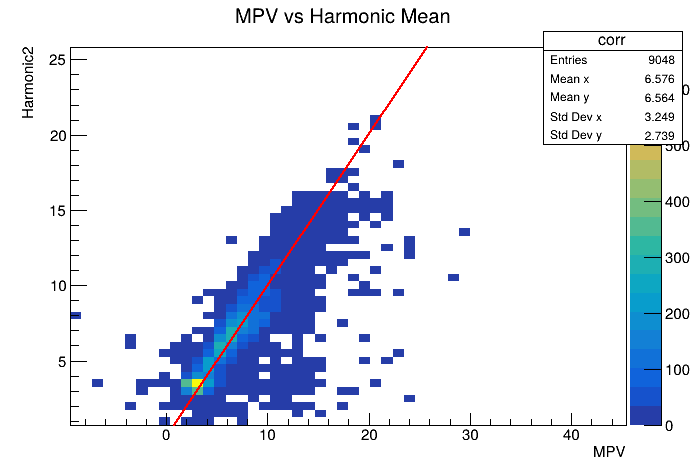

In [ ]:

corel_params = results["corel"]


c = rt.TCanvas()

x_vals = [r[0] for r in corel_params]
y_vals = [r[1] for r in corel_params]
corr_hist = rt.TH2F("corr", "MPV vs Harmonic Mean;MPV;Harmonic2", 50, min(x_vals), max(x_vals), 50, min(y_vals), max(y_vals))
for x, y in corel_params:
    corr_hist.Fill(x, y)
corr_hist.Draw("COLZ")


xmin, xmax = min(x_vals), max(x_vals)
ymin, ymax = min(y_vals), max(y_vals)


low  = max(xmin, ymin)
high = min(xmax, ymax)

diag = rt.TLine(low, low, high, high)   # y = x
diag.SetLineColor(rt.kRed)
diag.SetLineWidth(2)
diag.Draw("same")

c.Draw()

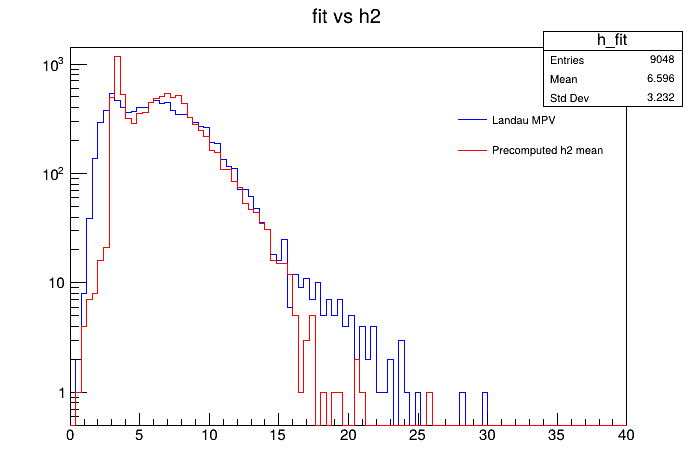

In [ ]:
c = rt.TCanvas()
c.SetLogy()
# N = len(corel_params)
hist_mpv = rt.TH1F("h_fit", "fit vs h2", 100, 0, 40)
hist_h2 = rt.TH1F("h_h2", "fit vs h2",100, 0, 40)


for mpv, h2 in corel_params:
  hist_mpv.Fill(mpv)
  hist_h2.Fill(h2)

hist_mpv.SetLineColor(rt.kBlue)
hist_h2.SetLineColor(rt.kRed)
max1 = hist_mpv.GetMaximum()
max2 = hist_h2.GetMaximum()
overall_max = max(max1, max2)
hist_mpv.SetMaximum(overall_max * 1.2)

hist_mpv.Draw()
hist_h2.Draw("same")

leg = rt.TLegend(0.65, 0.65, 0.88, 0.78)  # x1,y1,x2,y2 in NDC
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(hist_mpv, "Landau MPV", "l")
leg.AddEntry(hist_h2,  "Precomputed h2 mean", "l")
leg.Draw()

c.Draw()

In [ ]:
fit_tot = hist_mpv.Integral(0, -1)
h2_tot = hist_h2.Integral(0, -1)

print(f"fit histogram integral: {fit_tot}\nh2 histogram integral: {h2_tot} ")

fit histogram integral: 9048.0
h2 histogram integral: 9048.0 


In [25]:
import pandas as pd
print(type(df))


<class cppyy.gbl.ROOT.RDataFrame at 0x5e7e71e29350>


In [ ]:
cuts = (
    "(DeDx_PixelNoL1NOM >= 2) && "
    "(IsoTrack_pt > 55) && "
    "HLT_Mu50 && "
    "(IsoTrack_fractionOfValidHits > 0.8) && "
    "(nDeDxMeas >= 10) && "          # see §3
    "IsoTrack_isHighPurityTrack && "
    "(IsoTrack_normChi2 < 5) && "
    "(fabs(IsoTrack_dxy) < 0.02) && "
    "(fabs(IsoTrack_dz)  < 0.10)"
)

rdf_sel = df.Filter(cuts, "selection")
print("Tracks passing selection:", rdf_sel.Count().GetValue())


runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(string_view expression, string_view name = "") =>
    runtime_error: 
RDataFrame: An error occurred during just-in-time compilation. The lines above might indicate the cause of the crash
 All RDF objects that have not run an event loop yet should be considered in an invalid state.

  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(string_view expression, string_view name = "") =>
    runtime_error: 
RDataFrame: An error occurred during just-in-time compilation. The lines above might indicate the cause of the crash
 All RDF objects that have not run an event loop yet should be considered in an invalid state.


input_line_170:2:335: error: use of undeclared identifier 'nDeDxMeas'
auto func1(ROOT::VecOps::RVec<double>& var0, ROOT::VecOps::RVec<bool>& var1, ROOT::VecOps::RVec<double>& var2, ROOT::VecOps::RVec<unsigned int>& var3, ROOT::VecOps::RVec<double>& var4, ROOT::VecOps::RVec<double>& var5, ROOT::VecOps::RVec<double>& var6, const Bool_t var7){return (var3 >= 2) && (var6 > 55) && var7 && (var0 > 0.8) && (nDeDxMeas >= 10) && var1 && (var2 < 5) && (fabs(var4) < 0.02) && (fabs(var5)  < 0.10)
                                                                                                                                                                                                                                                                                                                                              ^
input_line_170:2:378: error: no matching function for call to 'fabs'
auto func1(ROOT::VecOps::RVec<double>& var0, ROOT::VecOps::RVec<bool>& var1, ROOT::VecOps::RVec<double>& 

In [ ]:
# drawer.save(c, f"{utils.PLOTS_DIR}/fit_vs_h2(used_precalculated_h2_vals_logy)",["png"])

In [ ]:
#generate a number of landau fit with known mpvs, use the datasets that make up the landau fits to calculate the harmonic2. check the corelation of the two 
#understand why we still get negative values
# and what makes up the outliers

In [ ]:
# # c = rt.TCanvas()
# stack = utils.write_stacked_histos("fits", hists, "some tracks fitted with the landau", c)